In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/LAB_MLOM/archive'

# Load the dataset
def load_data():
    chess_pieces = []
    labels = []
    for piece_type in os.listdir(data_path):
        for image_file in os.listdir(os.path.join(data_path, piece_type)):
            img = cv2.imread(os.path.join(data_path, piece_type, image_file))
            img = cv2.resize(img, (124, 124))
            chess_pieces.append(img)
            labels.append(piece_type)

    return np.array(chess_pieces), np.array(labels)

chess_pieces, labels = load_data()

# Encode labels into integers (e.g., 'bishop' -> 0, 'king' -> 1, etc.)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(chess_pieces, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:


model = Sequential()

# Convolutional layers
model.add(Conv2D(2, (3, 3), activation='sigmoid', strides=(1, 1), padding='valid', input_shape=(124, 124, 3), name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))
model.add(Conv2D(2, (3, 3), activation='relu', strides=(1, 1), padding='valid', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool2'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(50, activation='relu', name='FC1'))

# Output layer
model.add(Dense(6, activation='softmax', name='Output'))

# Print the model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 122, 122, 2)       56        
                                                                 
 Pool1 (MaxPooling2D)        (None, 61, 61, 2)         0         
                                                                 
 conv2 (Conv2D)              (None, 59, 59, 2)         38        
                                                                 
 Pool2 (MaxPooling2D)        (None, 29, 29, 2)         0         
                                                                 
 flatten (Flatten)           (None, 1682)              0         
                                                                 
 FC1 (Dense)                 (None, 50)                84150     
                                                                 
 Output (Dense)              (None, 6)                

In [6]:
#Create Data generators for training and validation
batch_size = 16
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size = (124, 124),
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'training'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    data_path,
    target_size = (124, 124),
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'validation'
)

Found 651 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))



Epoch 1/50
33/33 [==============================] - 6s 140ms/step - loss: 1.6507 - accuracy: 0.2596 - val_loss: 1.5854 - val_accuracy: 0.2901
Epoch 2/50
33/33 [==============================] - 5s 153ms/step - loss: 1.6006 - accuracy: 0.2731 - val_loss: 1.5806 - val_accuracy: 0.2519
Epoch 3/50
33/33 [==============================] - 3s 100ms/step - loss: 1.5925 - accuracy: 0.2865 - val_loss: 1.5656 - val_accuracy: 0.2901
Epoch 4/50
33/33 [==============================] - 7s 202ms/step - loss: 1.5762 - accuracy: 0.3269 - val_loss: 1.5464 - val_accuracy: 0.2901
Epoch 5/50
33/33 [==============================] - 3s 88ms/step - loss: 1.5474 - accuracy: 0.3365 - val_loss: 1.5760 - val_accuracy: 0.2977
Epoch 6/50
33/33 [==============================] - 3s 88ms/step - loss: 1.5422 - accuracy: 0.3173 - val_loss: 1.5646 - val_accuracy: 0.2595
Epoch 7/50
33/33 [==============================] - 3s 88ms/step - loss: 1.5090 - accuracy: 0.3231 - val_loss: 1.5433 - val_accuracy: 0.3130
Epoch 8/5

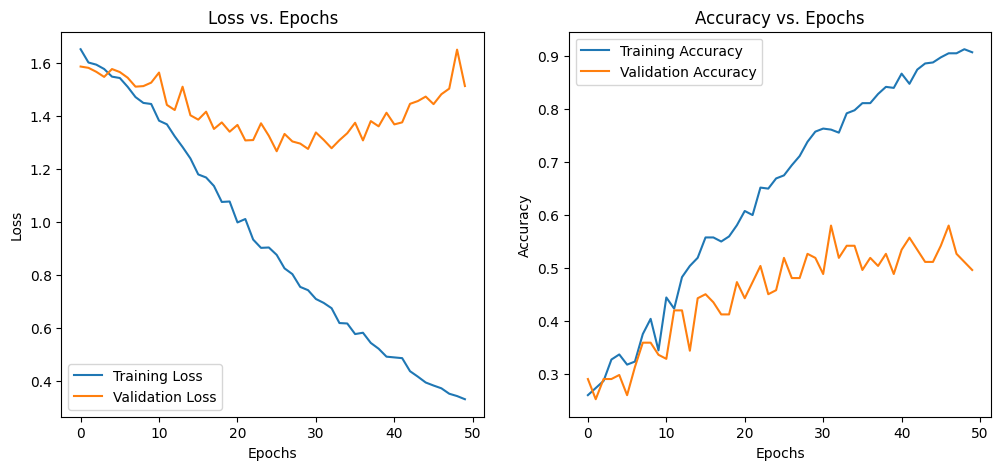

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')

plt.show()


In [13]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='sigmoid', strides=(1, 1), padding='valid', input_shape=(124, 124, 3), name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='valid', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool2'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', name='FC1'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(6, activation='softmax', name='Output'))

In [15]:
#Create Data generators for training and validation
batch_size = 16
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size = (124, 124),
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'training'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    data_path,
    target_size = (124, 124),
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'validation'
)

Found 651 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/50
33/33 [==============================] - 14s 399ms/step - loss: 2.2685 - accuracy: 0.2596 - val_loss: 1.7703 - val_accuracy: 0.2901
Epoch 2/50
33/33 [==============================] - 15s 454ms/step - loss: 1.7582 - accuracy: 0.2635 - val_loss: 1.7355 - val_accuracy: 0.2901
Epoch 3/50
33/33 [==============================] - 13s 389ms/step - loss: 1.7276 - accuracy: 0.2596 - val_loss: 1.6987 - val_accuracy: 0.2901
Epoch 4/50
33/33 [==============================] - 13s 388ms/step - loss: 1.6924 - accuracy: 0.2596 - val_loss: 1.6652 - val_accuracy: 0.2901
Epoch 5/50
33/33 [==============================] - 13s 390ms/step - loss: 1.6668 - accuracy: 0.2596 - val_loss: 1.6355 - val_accuracy: 0.2901
Epoch 6/50
33/33 [==============================] - 13s 388ms/step - loss: 1.6444 - accuracy: 0.2577 - val_loss: 1.6167 - val_accuracy: 0.2901
Epoch 7/50
33/33 [==============================] - 15s 449ms/step - loss: 1.6309 - accuracy: 0.2615 - val_loss: 1.6033 - val_accuracy: 0.2901

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')

plt.show()
